### Load the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

C:\ProgramData\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
#import nltk
#nltk.download('vader_lexicon')
  

### Load the Dataset

In [3]:
df=pd.read_excel('Tweets.xlsx')
df.head()

,tweet_id,airline,name,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


### Check the Zero and Null Values

In [4]:
df.isnull().sum()

tweet_id              0
airline               0
name                  0
retweet_count         0
text                  0
tweet_coord       13621
tweet_created         0
tweet_location     4733
user_timezone      4820
dtype: int64

In [5]:
df[df==0].count()

tweet_id              0
airline               0
name                  0
retweet_count     13873
text                  0
tweet_coord           0
tweet_created         0
tweet_location        0
user_timezone         0
dtype: int64

### Removing reduntant columns

In [6]:
df.drop(['tweet_coord','name','tweet_id','retweet_count','user_timezone','tweet_location'],axis=1,inplace=True)

### Cleaning the tweets

In [7]:
import string
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
def clean_text(text):
    no_punc = [s for s in text if s not in string.punctuation]
    no_punc = ''.join(no_punc)
    rm_words = [w for w in no_punc.split() if w.lower() not in stop_words]
    return ' '.join(rm_words)

In [8]:
df.text = df.text.apply(clean_text)

### Simplifying  the dates

In [9]:
df['tweet_created']=pd.to_datetime(df['tweet_created'])
df['tweet_created']=df['tweet_created'].dt.date

In [10]:
df.head()

,airline,text,tweet_created
0,Virgin America,VirginAmerica dhepburn said,2015-02-24
1,Virgin America,VirginAmerica plus youve added commercials exp...,2015-02-24
2,Virgin America,VirginAmerica didnt today Must mean need take ...,2015-02-24
3,Virgin America,VirginAmerica really aggressive blast obnoxiou...,2015-02-24
4,Virgin America,VirginAmerica really big bad thing,2015-02-24


### Calculating the length of tweets

In [11]:
df['length'] = df['text'].apply(len)

### SID is calculating the polarity of tweets whether it is positive,negative and neutral

In [12]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid=SentimentIntensityAnalyzer()

In [13]:
df['scores']=df['text'].apply(lambda text: sid.polarity_scores(text))

In [14]:
df.head()

,airline,text,tweet_created,length,scores
0,Virgin America,VirginAmerica dhepburn said,2015-02-24,27,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,Virgin America,VirginAmerica plus youve added commercials exp...,2015-02-24,59,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,Virgin America,VirginAmerica didnt today Must mean need take ...,2015-02-24,58,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,Virgin America,VirginAmerica really aggressive blast obnoxiou...,2015-02-24,94,"{'neg': 0.323, 'neu': 0.501, 'pos': 0.175, 'co..."
4,Virgin America,VirginAmerica really big bad thing,2015-02-24,34,"{'neg': 0.486, 'neu': 0.514, 'pos': 0.0, 'comp..."


In [15]:
df['compound']=df['scores'].apply( lambda score_dict : score_dict['compound'])

In [16]:
df.head(10)

,airline,text,tweet_created,length,scores,compound
0,Virgin America,VirginAmerica dhepburn said,2015-02-24,27,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,Virgin America,VirginAmerica plus youve added commercials exp...,2015-02-24,59,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,Virgin America,VirginAmerica didnt today Must mean need take ...,2015-02-24,58,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,Virgin America,VirginAmerica really aggressive blast obnoxiou...,2015-02-24,94,"{'neg': 0.323, 'neu': 0.501, 'pos': 0.175, 'co...",-0.3306
4,Virgin America,VirginAmerica really big bad thing,2015-02-24,34,"{'neg': 0.486, 'neu': 0.514, 'pos': 0.0, 'comp...",-0.5829
5,Virgin America,VirginAmerica seriously would pay 30 flight se...,2015-02-24,90,"{'neg': 0.264, 'neu': 0.563, 'pos': 0.173, 'co...",0.0963
6,Virgin America,VirginAmerica yes nearly every time fly VX “ea...,2015-02-24,67,"{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp...",0.4019
7,Virgin America,VirginAmerica Really missed prime opportunity ...,2015-02-24,88,"{'neg': 0.184, 'neu': 0.59, 'pos': 0.226, 'com...",0.1458
8,Virgin America,virginamerica Well didnt…but,2015-02-24,28,"{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'comp...",0.2732
9,Virgin America,VirginAmerica amazing arrived hour early Youre...,2015-02-24,51,"{'neg': 0.0, 'neu': 0.427, 'pos': 0.573, 'comp...",0.7717


### creating columns for sentiments

In [17]:
def comp_score(c):
    if c>0:
        return 'pos'
    elif c<0:
        return 'neg'
    else:
        return 'neu'
df['comp_score']=df['compound'].apply(lambda c: comp_score(c))

In [18]:
df.head(10)

,airline,text,tweet_created,length,scores,compound,comp_score
0,Virgin America,VirginAmerica dhepburn said,2015-02-24,27,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
1,Virgin America,VirginAmerica plus youve added commercials exp...,2015-02-24,59,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
2,Virgin America,VirginAmerica didnt today Must mean need take ...,2015-02-24,58,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,neu
3,Virgin America,VirginAmerica really aggressive blast obnoxiou...,2015-02-24,94,"{'neg': 0.323, 'neu': 0.501, 'pos': 0.175, 'co...",-0.3306,neg
4,Virgin America,VirginAmerica really big bad thing,2015-02-24,34,"{'neg': 0.486, 'neu': 0.514, 'pos': 0.0, 'comp...",-0.5829,neg
5,Virgin America,VirginAmerica seriously would pay 30 flight se...,2015-02-24,90,"{'neg': 0.264, 'neu': 0.563, 'pos': 0.173, 'co...",0.0963,pos
6,Virgin America,VirginAmerica yes nearly every time fly VX “ea...,2015-02-24,67,"{'neg': 0.0, 'neu': 0.803, 'pos': 0.197, 'comp...",0.4019,pos
7,Virgin America,VirginAmerica Really missed prime opportunity ...,2015-02-24,88,"{'neg': 0.184, 'neu': 0.59, 'pos': 0.226, 'com...",0.1458,pos
8,Virgin America,virginamerica Well didnt…but,2015-02-24,28,"{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'comp...",0.2732,pos
9,Virgin America,VirginAmerica amazing arrived hour early Youre...,2015-02-24,51,"{'neg': 0.0, 'neu': 0.427, 'pos': 0.573, 'comp...",0.7717,pos


### Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000170F8E1C588>,
      dtype=object)

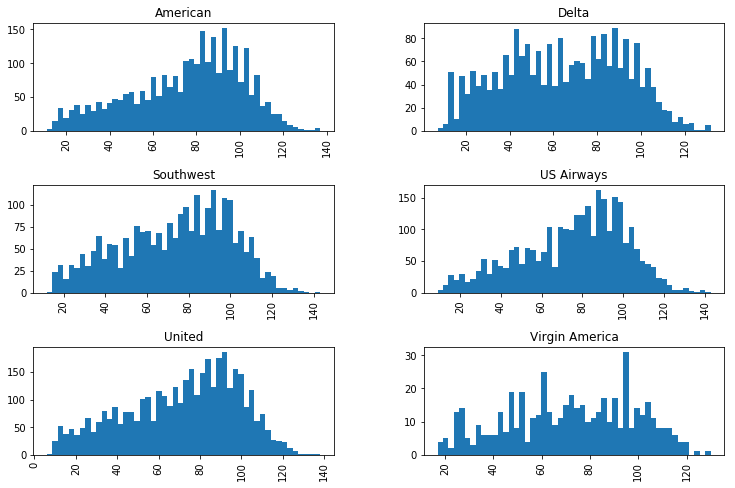

In [19]:
import matplotlib.pyplot as plt
                                                                            ### LENGTH OF TWEETS FOR EACH AIRLINE
df.hist(column='length',bins=50, by='airline',figsize=(12,8),grid=True)        

In [20]:
df.length.describe()

count    14640.000000
mean        72.419604
std         26.828820
min          6.000000
25%         52.000000
50%         77.000000
75%         93.000000
max        143.000000
Name: length, dtype: float64

In [21]:
pd.crosstab(df.length,df.comp_score)

comp_score,neg,neu,pos
length,,,
6,0,0,2
7,0,2,0
9,0,5,0
10,0,1,5
11,2,8,18
12,2,12,28
13,0,2,41
14,4,10,36
15,2,11,17


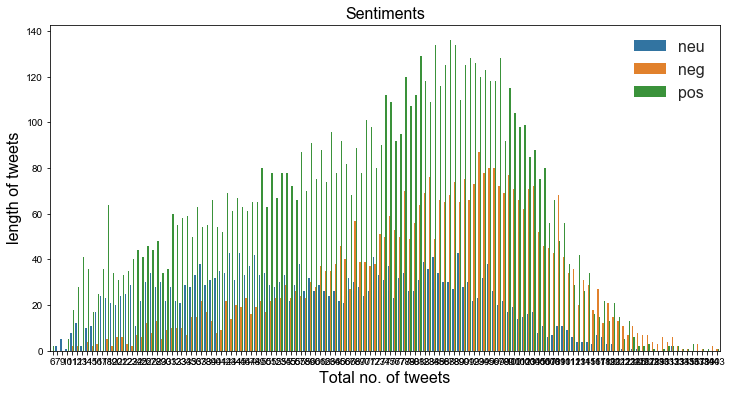

In [22]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.countplot(x='length',hue='comp_score',data=df)

sns.set()
plt.title('Sentiments',fontsize=16)
plt.xlabel("Total no. of tweets",fontsize=16)
plt.ylabel('length of tweets',fontsize=16)
plt.legend(loc='upper right',fontsize=16)

Text(0,0.5,'Sentiments')

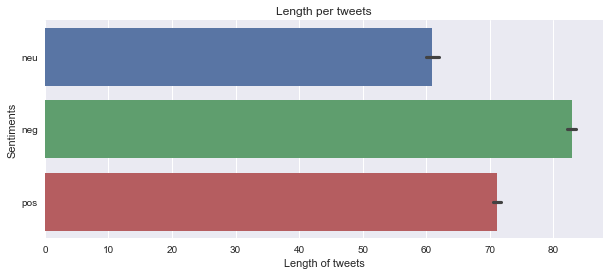

In [23]:
import seaborn as sns
plt.figure(figsize=(10,4))
sns.barplot(x=df['length'],y=df['comp_score'])

sns.set()
plt.title('Length per tweets',fontsize=12)
plt.xlabel("Length of tweets")
plt.ylabel('Sentiments')


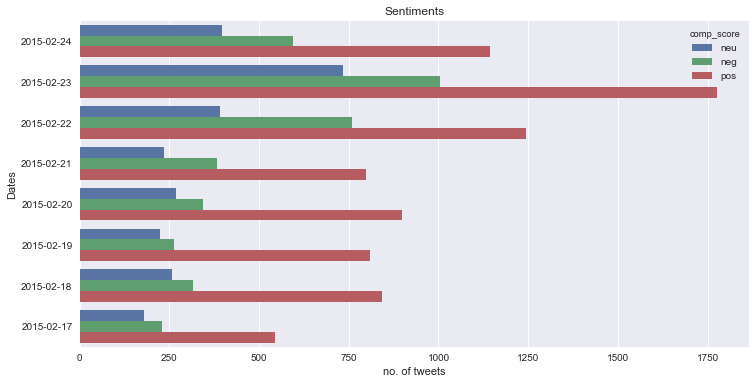

In [24]:
plt.figure(figsize=(12,6))
sns.countplot(y='tweet_created',data=df,hue='comp_score')
plt.title('Sentiments')
plt.xlabel("no. of tweets")
plt.ylabel('Dates')
sns.set()

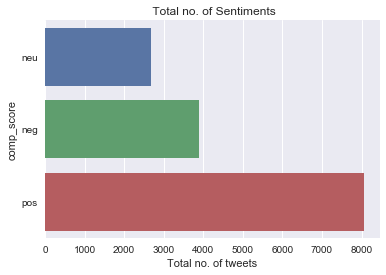

In [25]:
import seaborn as sns
sns.countplot(y='comp_score',data=df)
plt.title(' Total no. of Sentiments')
plt.xlabel("Total no. of tweets")

sns.set()

Text(0,0.5,'Airline')

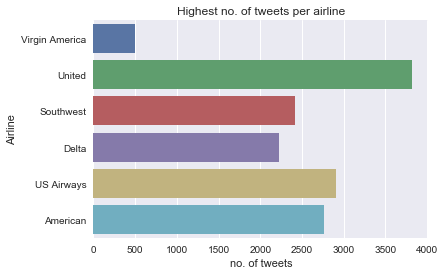

In [26]:
sns.countplot(y='airline',data=df)
sns,set()
plt.title('Highest no. of tweets per airline')
plt.xlabel("no. of tweets")
plt.ylabel('Airline')


In [27]:
pd.crosstab(df.airline,df.comp_score)

comp_score,neg,neu,pos
airline,,,
American,949,610,1200
Delta,530,662,1030
Southwest,610,581,1229
US Airways,1088,648,1177
United,612,42,3168
Virgin America,104,146,254


Text(0,0.5,'no. of tweets')

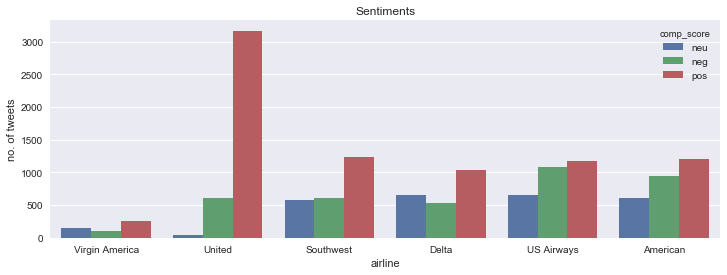

In [28]:
import seaborn as sns
sns.set()
plt.figure(figsize=(12,4))
sns.countplot(x='airline',hue='comp_score',data=df)
plt.title('Sentiments')
plt.ylabel("no. of tweets")

### Data Preprocessing

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
bag_of_words = CountVectorizer()
bag_of_words.fit(df['text'])
bag_of_words.vocabulary_

{'virginamerica': 15818,
 'dhepburn': 5023,
 'said': 13139,
 'plus': 11924,
 'youve': 16504,
 'added': 1980,
 'commercials': 4156,
 'experience': 5878,
 'tacky': 14465,
 'didnt': 5041,
 'today': 14895,
 'must': 10699,
 'mean': 10265,
 'need': 10819,
 'take': 14481,
 'another': 2390,
 'trip': 15096,
 'really': 12480,
 'aggressive': 2079,
 'blast': 3139,
 'obnoxious': 11167,
 'entertainment': 5657,
 'guests': 7018,
 'faces': 5949,
 'amp': 2313,
 'little': 9828,
 'recourse': 12546,
 'big': 3077,
 'bad': 2813,
 'thing': 14725,
 'seriously': 13419,
 'would': 16357,
 'pay': 11634,
 '30': 818,
 'flight': 6228,
 'seats': 13328,
 'playing': 11885,
 'flying': 6378,
 'va': 15705,
 'yes': 16458,
 'nearly': 10815,
 'every': 5774,
 'time': 14832,
 'fly': 6361,
 'vx': 15874,
 'ear': 5438,
 'worm': 16326,
 'won': 16282,
 'go': 6823,
 'away': 2733,
 'missed': 10502,
 'prime': 12147,
 'opportunity': 11326,
 'men': 10333,
 'without': 16248,
 'hats': 7141,
 'parody': 11558,
 'httpstcomwpg7grezp': 7511,
 '

In [30]:
txt_transform = bag_of_words.transform(df.text)
print(txt_transform.shape)

(14640, 16550)


### Creating the Model

In [31]:
from sklearn.naive_bayes import MultinomialNB
mn = MultinomialNB()

In [32]:
mn.fit(txt_transform,df.comp_score)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [33]:
def tweet(text):
    test = bag_of_words.transform([text])
    
    return(mn.predict(test))

In [34]:
pred = mn.predict(txt_transform)
pred

array(['neu', 'pos', 'pos', ..., 'pos', 'pos', 'pos'], dtype='<U3')

In [35]:
df.text.apply(tweet)

0        [neu]
1        [pos]
2        [pos]
3        [neg]
4        [pos]
5        [neg]
6        [pos]
7        [pos]
8        [pos]
9        [pos]
10       [neg]
11       [pos]
12       [pos]
13       [pos]
14       [pos]
15       [neg]
16       [pos]
17       [pos]
18       [pos]
19       [pos]
20       [pos]
21       [pos]
22       [pos]
23       [neg]
24       [pos]
25       [pos]
26       [neg]
27       [pos]
28       [pos]
29       [neg]
         ...  
14610    [neg]
14611    [pos]
14612    [pos]
14613    [neu]
14614    [pos]
14615    [neg]
14616    [pos]
14617    [pos]
14618    [neg]
14619    [pos]
14620    [neu]
14621    [neg]
14622    [pos]
14623    [pos]
14624    [neu]
14625    [pos]
14626    [neg]
14627    [neg]
14628    [pos]
14629    [pos]
14630    [pos]
14631    [pos]
14632    [pos]
14633    [neg]
14634    [neu]
14635    [pos]
14636    [neg]
14637    [pos]
14638    [pos]
14639    [pos]
Name: text, Length: 14640, dtype: object

### Predicting the tweets

In [36]:
tweets = df.iloc[1111][1]
tweets

'united getting better Id suggest get senior manager gate retrain gate people'

In [37]:
tweet('tweets')

array(['pos'], dtype='<U3')

### Calculating the Accuracy and Confusion Matrix

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix
confusion_matrix(df.comp_score,pred)

array([[3257,   39,  597],
       [ 242, 1548,  899],
       [ 271,   48, 7739]], dtype=int64)

In [39]:
accuracy_score(pred,df.comp_score)*100

85.68306010928963